In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.datasets import load_boston

In [2]:
b = load_boston()
X = b.data
y = b.target
print(X.shape,y.shape)

(506, 13) (506,)


In [3]:
df = pd.DataFrame(X)
u = np.mean(X,axis=0)
std = np.std(X,axis=0)
X= (X-u)/std

In [4]:
df = pd.DataFrame(X[:5,:])
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,-0.419782,0.284830,-1.287909,-0.272599,-0.144217,0.413672,-0.120013,0.140214,-0.982843,-0.666608,-1.459000,0.441052,-1.075562
1,-0.417339,-0.487722,-0.593381,-0.272599,-0.740262,0.194274,0.367166,0.557160,-0.867883,-0.987329,-0.303094,0.441052,-0.492439
2,-0.417342,-0.487722,-0.593381,-0.272599,-0.740262,1.282714,-0.265812,0.557160,-0.867883,-0.987329,-0.303094,0.396427,-1.208727
3,-0.416750,-0.487722,-1.306878,-0.272599,-0.835284,1.016303,-0.809889,1.077737,-0.752922,-1.106115,0.113032,0.416163,-1.361517
4,-0.412482,-0.487722,-1.306878,-0.272599,-0.835284,1.228577,-0.511180,1.077737,-0.752922,-1.106115,0.113032,0.441052,-1.026501


In [5]:
ones = np.ones((X.shape[0],1))
X = np.hstack((ones,X))
print(X.shape) 
Y = y

(506, 14)


# gradient descent algo for linear regression multivariate

In [6]:
#print(Y)

[ 7.4316371  -0.53940089  0.45621504 -0.59956587  0.47866297 -0.47703445
  1.57710753 -0.3813406  -0.04916222 -0.33195241 -0.56501947 -0.97988071
  0.5111999  -1.45565983]
[592.1469169960473, 590.6782690271461, 589.2165305368787, 587.7616394538618, 586.3135344194942, 584.8721547793522, 583.437440574672, 582.0093325339504, 580.5877720646372, 579.1727012449373, 577.7640628157022, 576.3618001724417, 574.9658573573976, 573.5761790517521, 572.1927105679069, 570.8153978418642, 569.4441874256983, 568.0790264801251, 566.7198627671517, 565.366644642826, 564.0193210500681, 562.677841511592, 561.3421561229113, 560.0122155454375, 558.6879709996451, 557.3693742583422, 556.0563776400093, 554.7489340022177, 553.4469967351408, 552.1505197551296, 550.8594574983779, 549.5737649146557, 548.2933974611283, 547.018311096244, 545.7484622736963, 544.4838079364636, 543.2243055109202, 541.9699129010136, 540.7205884825242, 539.4762910973857, 538.2369800480747, 537.0026150920711, 535.7731564363921, 534.5485647321

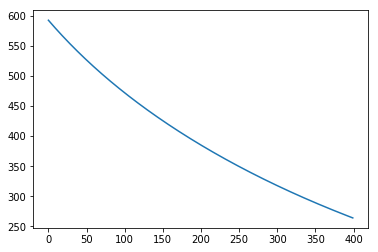

In [9]:
def hypothesis(theta,x):
    return np.dot(x,theta)

def error(X,Y,theta):
    tot_error = 0
    m = X.shape[0]
    for i in range(m):
        tot_error+=(Y[i]-hypothesis(theta,X[i]))**2
    return tot_error/m

def gradient(Y,X,theta):
    m,n=X.shape
    grad= np.zeros((n,))
    for j in range(n):
        for i in range(m):
            y_ = hypothesis(theta,X[i])
            grad[j]+=(y_-Y[i])*X[i][j]
    return grad/m

def gradientDescent(X,Y,learning_rate,max_itr):
    m,n = X.shape
    theta=np.zeros((n,))    
    error_list = []
    for i in range(max_itr):
        grad = gradient(Y,X,theta)
        e = error(X,Y,theta)
        error_list.append(e)
        for j in range(n):
            theta[j]=theta[j]-learning_rate*grad[j]
    return theta,error_list

theta,error_list = gradientDescent(X,Y,learning_rate=0.001,max_itr=400)
print(theta)
print(error_list)
plt.plot(error_list)


In [8]:
for i in range(40,50):
    print(hypothesis(theta,X[i]))

13.291248363161449
10.880695862937998
9.53650728321455
9.389077485536873
8.282632846417682
7.55437559473318
7.073477276551633
6.005442834574843
2.6527654726154672
6.010321029375293
